각 module에 대한 누락된 값의 평균:
moduleName
Binance #01 (Deposit)    0.370791
fee_collector            0.058340
gov                      0.047377
Name: is_missing, dtype: float64


/var/folders/rs/451vhmx909jbf4784zj52l980000gn/T/ipykernel_57163/3195682668.py:85: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  plt.savefig(output_image_name, facecolor='white')
/var/folders/rs/451vhmx909jbf4784zj52l980000gn/T/ipykernel_57163/3195682668.py:85: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  plt.savefig(output_image_name, facecolor='white')
/var/folders/rs/451vhmx909jbf4784zj52l980000gn/T/ipykernel_57163/3195682668.py:85: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  plt.savefig(output_image_name, facecolor='white')
/var/folders/rs/451vhmx909jbf4784zj52l980000gn/T/ipykernel_57163/3195682668.py:85: UserWarning: Glyph 46384 (\N{HANGUL SYLLABLE DDA}) missing from current font.
  plt.savefig(output_image_name, facecolor='white')
/var/folders/rs/451vhmx909jbf4784zj52l980000gn/T/ipykernel_57163/3195682668.py:85: UserWarning: Glyph 47480 (\N{HANGUL SYLLABLE REUN}) missing from cur

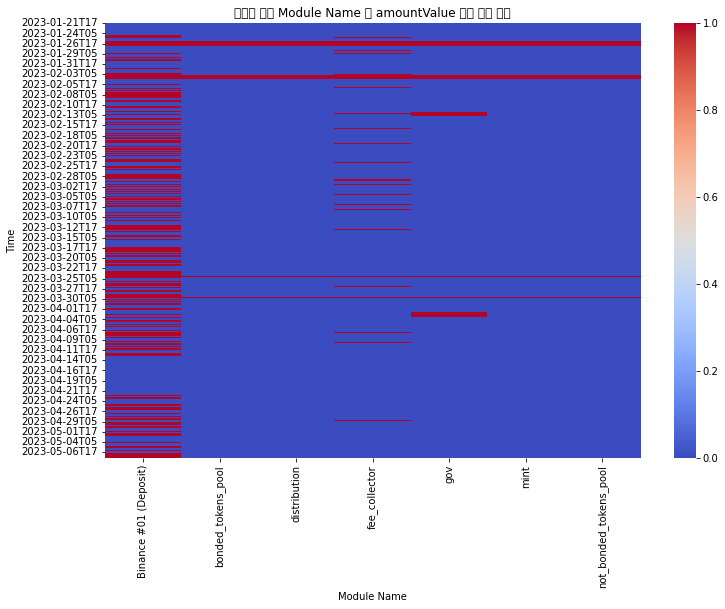

In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# 입력 파일 이름
#input_file_name = './data/ucosmos-balance.csv'
#input_file_name = './data/ujuno-balance.csv'
#input_file_name = './data/ukava-balance.csv'
input_file_name = './data/uosmo-balance.csv'

# 데이터셋 로드
data = pd.read_csv(input_file_name)

# '_time' 열을 datetime 형식으로 변환
data['_time'] = pd.to_datetime(data['_time'])

# '2023-01-27T17:00:00Z' 이전의 데이터 필터링
data = data[data['_time'] >= '2023-01-21T17:00:00Z']

# 데이터셋에서 -1을 NaN (Null)로 대체
data.replace(-1, pd.NA, inplace=True)

# 'amountValue'가 누락된 경우를 표시하는 새로운 이진 열 'is_missing' 생성
data['is_missing'] = data['amountValue'].isnull()

# '_time'을 datetime 형식으로 변환한 후, 날짜를 시간까지만 포함하도록 문자열 재포맷
data['_time'] = pd.to_datetime(data['_time']).dt.strftime('%Y-%m-%dT%H')

# moduleName과 _time으로 데이터를 그룹화한 후 'is_missing'의 평균 계산
missing_by_module_time = data.groupby(['moduleName', '_time'])['is_missing'].mean().reset_index()

# module 이름을 열로, 시간을 행으로 하는 평균에 대한 피벗 테이블 생성
missing_by_module_time_pivot_mean = missing_by_module_time.pivot_table(index='_time', columns=['moduleName'], values='is_missing', fill_value=0)

# 각 module에 대한 누락된 값의 평균을 계산하고 6자리 소수점으로 반올림
mean_of_missing_values = missing_by_module_time.groupby('moduleName')['is_missing'].mean().round(6)

# 반올림 값 중 가장 빈번한 값 찾기
counter = Counter(mean_of_missing_values)
most_frequent_value = counter.most_common(1)[0][0]

# 가장 빈번한 값 필터링
mean_of_missing_values = mean_of_missing_values[mean_of_missing_values != most_frequent_value]

# mean_of_missing_values를 내림차순으로 정렬
mean_of_missing_values = mean_of_missing_values.sort_values(ascending=False)

# 각 module에 대한 누락된 값의 평균 출력
print("각 module에 대한 누락된 값의 평균:")
print(mean_of_missing_values)

# 파일의 기본 이름(디렉토리 없음)을 가져와서 파일 확장자 제거
base_file_name = os.path.basename(input_file_name)
base_file_name_without_extension = os.path.splitext(base_file_name)[0]

# 결과 파일이 저장될 디렉토리 정의
output_directory = './result-files/'

# 출력 파일 이름 생성
output_file_name = output_directory + base_file_name_without_extension + '.missing-result.txt'
output_image_name = output_directory + base_file_name_without_extension + '_heatmap.png'

# 누락된 값의 평균을 수정된 파일 이름의 텍스트 파일로 저장
mean_of_missing_values.to_csv(output_file_name, header=True)

# 가장 빈번한 누락 값을 동일한 출력 텍스트 파일에 추가
with open(output_file_name, 'a') as f:
    f.write('\n가장 빈번한 누락 값: ' + str(most_frequent_value))
    
# moduleName 별로 누락된 값을 히트맵으로 시각화
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(missing_by_module_time_pivot_mean, cmap='coolwarm', cbar=True, ax=ax)

# 배경색을 흰색으로 설정
ax.set_facecolor('white')

# 흰색 배경과 대비되는 색의 레이블과 제목 설정
plt.xlabel("Module Name", color='black')
plt.ylabel("Time", color='black')
plt.title("시간에 따른 Module Name 별 amountValue 누락 값의 평균", color='black')

# 플롯을 이미지 파일로 저장
plt.savefig(output_image_name, facecolor='white')

# 플롯 보여주기
plt.show()